In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Data visualization
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

# Ignoring Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("student-scores.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

In [5]:
df.isna().sum()

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64

In [6]:
df.isna().sum()

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [9]:
df.tail()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
1995,1996,Alan,Reynolds,alan.reynolds.1996@gslingacademy.com,male,False,2,False,30,Construction Engineer,83,77,84,73,75,84,82
1996,1997,Thomas,Gilbert,thomas.gilbert.1997@gslingacademy.com,male,False,2,False,20,Software Engineer,89,65,73,80,87,67,73
1997,1998,Madison,Cross,madison.cross.1998@gslingacademy.com,female,False,5,False,14,Software Engineer,97,85,63,93,68,94,78
1998,1999,Brittany,Compton,brittany.compton.1999@gslingacademy.com,female,True,10,True,5,Business Owner,51,96,72,89,95,88,75
1999,2000,Natalie,Smith,natalie.smith.2000@gslingacademy.com,female,False,5,False,27,Accountant,82,99,91,69,83,93,100


In [10]:
df.columns

Index(['id', 'first_name', 'last_name', 'email', 'gender', 'part_time_job',
       'absence_days', 'extracurricular_activities', 'weekly_self_study_hours',
       'career_aspiration', 'math_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score', 'english_score', 'geography_score'],
      dtype='object')

In [11]:
df = df[[#'id',
         'first_name', 'last_name', 
    #'email',
    'gender', 'part_time_job',
       'absence_days', 'extracurricular_activities', 'weekly_self_study_hours',
       'career_aspiration', 'math_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score', 'english_score', 'geography_score']].copy()

In [12]:
df['average_score'] = (df['math_score'] + df['history_score'] + df['physics_score'] + df['chemistry_score'] + df['biology_score'] + df['english_score'] + df['geography_score']) / 7

In [13]:
df

,first_name,last_name,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,average_score
0,Paul,Casey,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,82.000000
1,Danielle,Sandoval,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,91.428571
2,Tina,Andrews,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,86.428571
3,Tara,Clark,female,False,5,False,3,Artist,71,74,88,80,89,63,86,78.714286
4,Anthony,Campos,male,False,5,False,10,Unknown,84,77,65,65,80,74,76,74.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Alan,Reynolds,male,False,2,False,30,Construction Engineer,83,77,84,73,75,84,82,79.714286
1996,Thomas,Gilbert,male,False,2,False,20,Software Engineer,89,65,73,80,87,67,73,76.285714
1997,Madison,Cross,female,False,5,False,14,Software Engineer,97,85,63,93,68,94,78,82.571429
1998,Brittany,Compton,female,True,10,True,5,Business Owner,51,96,72,89,95,88,75,80.857143


<Axes: title={'center': 'Weekly Self Study Hours'}, ylabel='Count'>

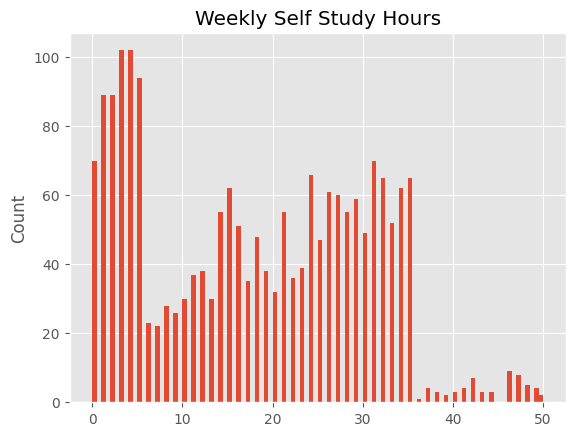

In [14]:
df['weekly_self_study_hours'].plot(kind='hist', bins=100, title='Weekly Self Study Hours',ylabel="Count")

<Axes: title={'center': 'Part Time Job'}, xlabel='Part Time Job', ylabel='Count'>

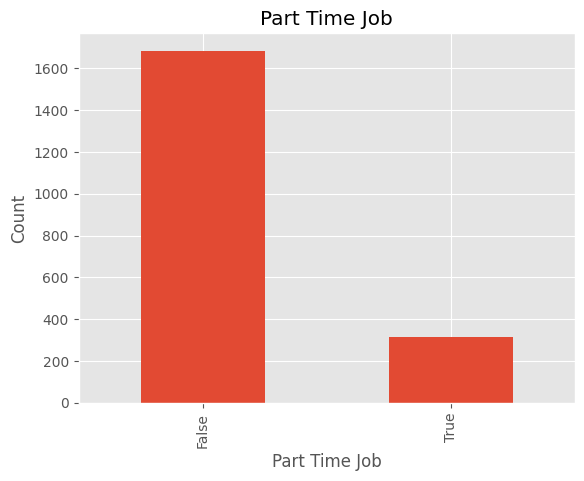

In [15]:
df['part_time_job'].value_counts().plot(kind='bar', title='Part Time Job',ylabel="Count",xlabel="Part Time Job")

In [16]:
df = df.drop(['first_name','last_name'], axis=1)

In [17]:
df

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,average_score
0,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,82.000000
1,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,91.428571
2,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,86.428571
3,female,False,5,False,3,Artist,71,74,88,80,89,63,86,78.714286
4,male,False,5,False,10,Unknown,84,77,65,65,80,74,76,74.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,male,False,2,False,30,Construction Engineer,83,77,84,73,75,84,82,79.714286
1996,male,False,2,False,20,Software Engineer,89,65,73,80,87,67,73,76.285714
1997,female,False,5,False,14,Software Engineer,97,85,63,93,68,94,78,82.571429
1998,female,True,10,True,5,Business Owner,51,96,72,89,95,88,75,80.857143


In [18]:
df.gender = df.gender.map({"male":0,"female":1})
df.career_aspiration = df.career_aspiration.map({"Software Engineer":0,"Business Owner":1,"Unknown":2,"Banker":3,"Lawyer":4,"Accountant":5,"Doctor":6,"Real Estate Developer":7,"Stock Investor":8,"Construction Engineer":9,"Artist":10,"Game Developer":11,"Government Officer":12,"Teacher":13,"Designer":14,"Scientist":15,"Writer":16})

In [19]:
df.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,average_score
0,0,False,3,False,27,4,73,81,93,97,63,80,87,82.000000
1,1,False,2,False,47,6,90,86,96,100,90,88,90,91.428571
2,1,False,9,True,13,12,81,97,95,96,65,77,94,86.428571
3,1,False,5,False,3,10,71,74,88,80,89,63,86,78.714286
4,0,False,5,False,10,2,84,77,65,65,80,74,76,74.428571


In [20]:
numeric_cols = ['weekly_self_study_hours', 'math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score', 'average_score']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

<Axes: >

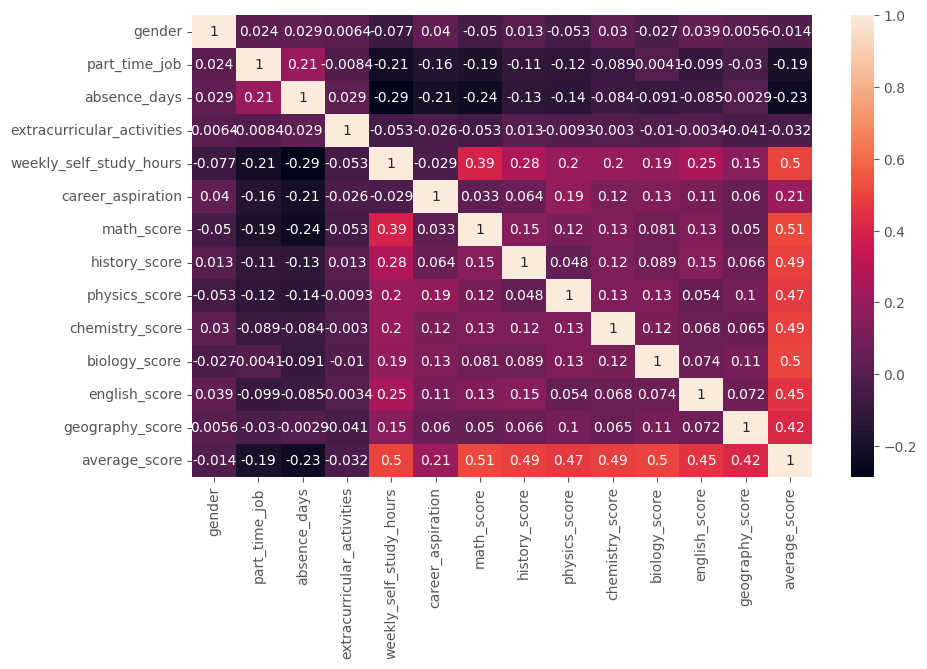

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [22]:
X = df.drop('career_aspiration', axis=1)
y = df['career_aspiration']
X.shape, y.shape

((2000, 13), (2000,))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.metrics import classification_report
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}
svc = SVC(random_state=1234)
svc.fit(X_train_scaled,y_train)
y_pred = svc.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.32      0.38        76
           1       0.87      0.90      0.89        61
           2       0.71      0.23      0.35        65
           3       0.51      0.44      0.47        72
           4       0.68      0.67      0.67        72
           5       0.59      0.50      0.54        66
           6       0.59      0.97      0.73        66
           7       0.71      0.69      0.70        65
           8       0.70      0.52      0.59        64
           9       0.51      0.88      0.65        51
          10       0.80      0.80      0.80        59
          11       0.76      0.92      0.83        51
          12       0.81      0.81      0.81        57
          13       0.78      0.95      0.86        60
          14       0.67      0.62      0.65        56
          15       0.82      0.84      0.83        69
          16       0.83      0.87      0.85        61

    accuracy              

In [28]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}
svm_clf = SVC(random_state=1234)
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred1 = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.52      0.45      0.48        76
           1       0.90      0.89      0.89        61
           2       0.67      0.45      0.54        65
           3       0.68      0.69      0.69        72
           4       0.75      0.76      0.76        72
           5       0.73      0.73      0.73        66
           6       0.76      0.94      0.84        66
           7       0.88      0.91      0.89        65
           8       0.88      0.70      0.78        64
           9       0.78      0.98      0.87        51
          10       0.95      0.95      0.95        59
          11       0.96      0.94      0.95        51
          12       0.84      0.93      0.88        57
          13       0.98      0.98      0.98        60
          14       0.88      0.82      0.85        56
          15       0.88      0.99      0.93        69
          16       0.89      0.95      0.92        61

    accuracy              

In [34]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)
y_pred2 = knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.34      0.24      0.28        76
           1       0.88      0.62      0.73        61
           2       0.49      0.34      0.40        65
           3       0.57      0.53      0.55        72
           4       0.74      0.72      0.73        72
           5       0.69      0.61      0.65        66
           6       0.81      0.89      0.85        66
           7       0.86      0.77      0.81        65
           8       0.72      0.77      0.74        64
           9       0.72      0.94      0.81        51
          10       0.78      0.85      0.81        59
          11       0.82      0.98      0.89        51
          12       0.82      0.88      0.85        57
          13       0.85      0.95      0.90        60
          14       0.72      0.82      0.77        56
          15       0.85      0.99      0.91        69
          16       0.74      0.87      0.80        61

    accuracy              

In [46]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled,y_train)
y_pred3 = dtc.predict(X_test_scaled)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.35      0.24      0.28        76
           1       0.84      0.79      0.81        61
           2       0.33      0.28      0.30        65
           3       0.50      0.46      0.48        72
           4       0.78      0.64      0.70        72
           5       0.61      0.65      0.63        66
           6       0.74      0.83      0.79        66
           7       0.61      0.62      0.61        65
           8       0.47      0.53      0.50        64
           9       0.65      0.71      0.68        51
          10       0.83      0.76      0.80        59
          11       0.81      0.84      0.83        51
          12       0.59      0.68      0.63        57
          13       0.77      0.83      0.80        60
          14       0.43      0.55      0.48        56
          15       0.87      0.88      0.88        69
          16       0.84      0.87      0.85        61

    accuracy              

In [45]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled,y_train)
y_pred2 = knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.38      0.17      0.24        76
           1       0.93      0.70      0.80        61
           2       0.64      0.45      0.53        65
           3       0.70      0.69      0.70        72
           4       0.79      0.81      0.80        72
           5       0.75      0.76      0.75        66
           6       0.85      0.92      0.88        66
           7       0.87      0.89      0.88        65
           8       0.76      0.86      0.81        64
           9       0.75      0.96      0.84        51
          10       0.86      0.93      0.89        59
          11       0.82      0.96      0.88        51
          12       0.85      0.88      0.86        57
          13       0.91      0.97      0.94        60
          14       0.73      0.88      0.80        56
          15       0.92      0.99      0.95        69
          16       0.82      0.95      0.88        61

    accuracy              

In [47]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled,y_train)
y_pred3 = rfc.predict(X_test_scaled)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.56      0.41      0.47        76
           1       0.95      0.90      0.92        61
           2       0.76      0.40      0.53        65
           3       0.69      0.65      0.67        72
           4       0.84      0.93      0.88        72
           5       0.88      0.76      0.81        66
           6       0.80      0.97      0.88        66
           7       0.93      0.83      0.88        65
           8       0.91      0.78      0.84        64
           9       0.70      0.98      0.82        51
          10       0.89      0.97      0.93        59
          11       0.85      0.98      0.91        51
          12       0.84      0.93      0.88        57
          13       0.86      0.98      0.91        60
          14       0.87      0.80      0.83        56
          15       0.84      1.00      0.91        69
          16       0.89      0.97      0.93        61

    accuracy              

In [48]:
sgd = SGDClassifier()
sgd.fit(X_train_scaled,y_train)
y_pred3 = sgd.predict(X_test_scaled)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.14      0.04      0.06        76
           1       0.81      0.89      0.84        61
           2       0.00      0.00      0.00        65
           3       0.17      0.19      0.18        72
           4       0.29      0.25      0.27        72
           5       0.32      0.59      0.41        66
           6       0.58      0.58      0.58        66
           7       0.48      0.22      0.30        65
           8       0.11      0.19      0.14        64
           9       0.28      0.14      0.18        51
          10       0.55      0.27      0.36        59
          11       0.52      0.69      0.59        51
          12       0.26      0.18      0.21        57
          13       0.26      0.58      0.36        60
          14       0.17      0.18      0.18        56
          15       0.55      0.35      0.42        69
          16       0.39      0.64      0.49        61

    accuracy              

In [66]:
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)
y_pred3 = lr.predict(X_test_scaled)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.29      0.24      0.26        76
           1       0.79      0.89      0.84        61
           2       0.24      0.14      0.18        65
           3       0.17      0.07      0.10        72
           4       0.43      0.56      0.48        72
           5       0.50      0.48      0.49        66
           6       0.48      0.62      0.54        66
           7       0.41      0.26      0.32        65
           8       0.36      0.20      0.26        64
           9       0.38      0.67      0.48        51
          10       0.55      0.58      0.56        59
          11       0.55      0.78      0.65        51
          12       0.30      0.28      0.29        57
          13       0.54      0.83      0.65        60
          14       0.18      0.14      0.16        56
          15       0.60      0.62      0.61        69
          16       0.58      0.62      0.60        61

    accuracy              